# LINEAR REGRESSION WITH PYTHON SCIKIT-LERAN

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

# AUTHOR :  IGEMHOKHAI SHEDRACH

In [26]:
# Importing required libaries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Loading Data into df

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\INTERNSHIPS\The Spark Foundation\TASK 1\data-w.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


visualising data

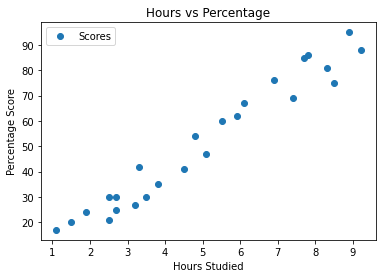

In [3]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Split data into target and feature

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

CREATING BASELINE

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
y_mean=y_train.mean()
y_mean

50.85

In [9]:
y_pred_baseline=[y_mean]*len(y_train)
y_pred_baseline[:3]

[50.85, 50.85, 50.85]

Visualising baseline

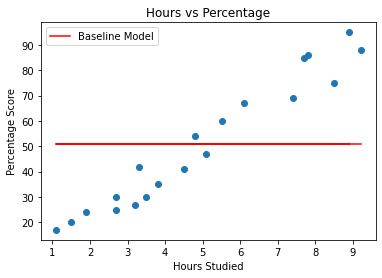

In [10]:
plt.plot(X_train,y_pred_baseline,color="red",label="Baseline Model")
plt.scatter(X_train,y_train)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.legend();

Estimate Baseline

In [11]:
mae_baseline= mean_absolute_error(y_train,y_pred_baseline)
print("BASELINE MAE:",round(mae_baseline,2))

BASELINE MAE: 22.14


# Building Model

In [12]:
from sklearn.linear_model import LinearRegression  

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [16]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred.head()

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


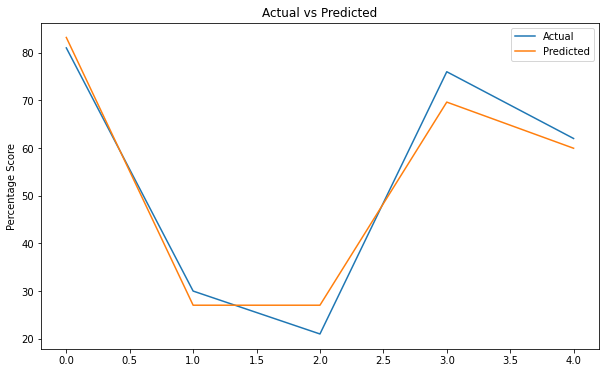

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df_pred['Actual'])
plt.plot(df_pred['Predicted'])
plt.ylabel('Percentage Score')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('Actual vs Predicted')
plt.show()

Estimating Model's Prediction

In [18]:
intercept=round(model.intercept_,3)
coefficient=round(model.coef_[0],3)
print(f"Percentage Score={intercept}+{coefficient}*(Hours Studied)")

Percentage Score=2.827+9.682*(Hours Studied)


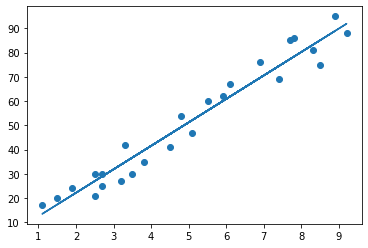

In [19]:
# Plotting the regression line
line = coefficient*X+intercept

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Testing Model

In [20]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


Estimate Model Perfermance

In [21]:
mae_pred=mean_absolute_error(y_test,y_pred)
mae_pred

3.9207511902099244

Creating a function that takes the values for hours, parses it into a dataframe and returns a prediction

In [22]:
def make_prediction(Hours):
    data={"Hours":Hours}
    df=pd.DataFrame(data,index=[0])
    prediction=model.predict(df).round(1)[0]
    return f"Percentage Score: {prediction}"

In [24]:
from ipywidgets import FloatSlider, interact

Creating an interactive widget that displays how the percentage score varies with the number of hours studied

In [25]:
interact(
    make_prediction,
    Hours=FloatSlider(
        min=X_test.min(),
        max=10,
        step=0.05,
        value=X_test.mean(),
    )
);

interactive(children=(FloatSlider(value=5.220000000000001, description='Hours', max=10.0, min=2.5, step=0.05),…

Using Linear Regression, we have been able to come up with a model, that predicts the percentage score of student based on the number of hours studied. Kindly note, that for better evaluation of performance, more features such as Students's IQ, Rate of Assimilation and other student dependent metrics would be needed.